In [1]:
!pip install feature-engine
!pip install imbalanced-learn
!pip install scikit-learn

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import ADASYN




In [3]:
df = pd.read_csv('lung_cancer_dataset.csv')

df.head(3)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO


In [4]:
df.shape

(309, 16)

In [5]:
df.columns = map(str.lower, df.columns)
df.columns

Index(['gender', 'age', 'smoking', 'yellow_fingers', 'anxiety',
       'peer_pressure', 'chronic disease', 'fatigue ', 'allergy ', 'wheezing',
       'alcohol consuming', 'coughing', 'shortness of breath',
       'swallowing difficulty', 'chest pain', 'lung_cancer'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   gender                 309 non-null    object
 1   age                    309 non-null    int64 
 2   smoking                309 non-null    int64 
 3   yellow_fingers         309 non-null    int64 
 4   anxiety                309 non-null    int64 
 5   peer_pressure          309 non-null    int64 
 6   chronic disease        309 non-null    int64 
 7   fatigue                309 non-null    int64 
 8   allergy                309 non-null    int64 
 9   wheezing               309 non-null    int64 
 10  alcohol consuming      309 non-null    int64 
 11  coughing               309 non-null    int64 
 12  shortness of breath    309 non-null    int64 
 13  swallowing difficulty  309 non-null    int64 
 14  chest pain             309 non-null    int64 
 15  lung_cancer            

In this dataset "2" represents "yes" and "1" represents "no". Let's change it to "1" to be "yes" and "0" to be "no".

In [8]:
df.isnull().sum()

gender                   0
age                      0
smoking                  0
yellow_fingers           0
anxiety                  0
peer_pressure            0
chronic disease          0
fatigue                  0
allergy                  0
wheezing                 0
alcohol consuming        0
coughing                 0
shortness of breath      0
swallowing difficulty    0
chest pain               0
lung_cancer              0
dtype: int64

In [9]:
df.duplicated().sum()

33

In [10]:
df=df.drop_duplicates()
df.duplicated().sum()

0

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,276.0,62.909420,8.379355,21.0,57.75,62.5,69.0,87.0
smoking,276.0,1.543478,0.499011,1.0,1.00,2.0,2.0,2.0
yellow_fingers,276.0,1.576087,0.495075,1.0,1.00,2.0,2.0,2.0
anxiety,276.0,1.496377,0.500895,1.0,1.00,1.0,2.0,2.0
peer_pressure,276.0,1.507246,0.500856,1.0,1.00,2.0,2.0,2.0
chronic disease,276.0,1.521739,0.500435,1.0,1.00,2.0,2.0,2.0
fatigue,276.0,1.663043,0.473529,1.0,1.00,2.0,2.0,2.0
allergy,276.0,1.547101,0.498681,1.0,1.00,2.0,2.0,2.0
wheezing,276.0,1.547101,0.498681,1.0,1.00,2.0,2.0,2.0
alcohol consuming,276.0,1.550725,0.498324,1.0,1.00,2.0,2.0,2.0


We have handled numerical values beforehand with transforming "2" to "1" and "1" to "0" Manually. Now Let's use label encoder to transform non-numerical values to "1" and "0"

In [13]:
labelEncoder = LabelEncoder()

df['gender'] = labelEncoder.fit_transform(df['gender'])
df['age'] = labelEncoder.fit_transform(df['age'])
df['smoking'] = labelEncoder.fit_transform(df['smoking'])
df['yellow_fingers'] = labelEncoder.fit_transform(df['yellow_fingers'])
df['anxiety'] = labelEncoder.fit_transform(df['anxiety'])
df['peer_pressure'] = labelEncoder.fit_transform(df['peer_pressure'])
df['chronic disease'] = labelEncoder.fit_transform(df['chronic disease'])
df['fatigue '] = labelEncoder.fit_transform(df['fatigue '])
df['allergy '] = labelEncoder.fit_transform(df['allergy '])
df['wheezing'] = labelEncoder.fit_transform(df['wheezing'])
df['alcohol consuming'] = labelEncoder.fit_transform(df['alcohol consuming'])
df['coughing'] = labelEncoder.fit_transform(df['coughing'])
df['shortness of breath'] = labelEncoder.fit_transform(df['shortness of breath'])
df['swallowing difficulty'] = labelEncoder.fit_transform(df['swallowing difficulty'])
df['chest pain'] = labelEncoder.fit_transform(df['chest pain'])
df['lung_cancer'] = labelEncoder.fit_transform(df['lung_cancer'])


df.head(3)

,gender,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic disease,fatigue,allergy,wheezing,alcohol consuming,coughing,shortness of breath,swallowing difficulty,chest pain,lung_cancer
0,1,26,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,31,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,16,0,0,0,1,0,1,0,1,0,1,1,0,1,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   gender                 276 non-null    int64
 1   age                    276 non-null    int64
 2   smoking                276 non-null    int64
 3   yellow_fingers         276 non-null    int64
 4   anxiety                276 non-null    int64
 5   peer_pressure          276 non-null    int64
 6   chronic disease        276 non-null    int64
 7   fatigue                276 non-null    int64
 8   allergy                276 non-null    int64
 9   wheezing               276 non-null    int64
 10  alcohol consuming      276 non-null    int64
 11  coughing               276 non-null    int64
 12  shortness of breath    276 non-null    int64
 13  swallowing difficulty  276 non-null    int64
 14  chest pain             276 non-null    int64
 15  lung_cancer            276 non-null    int64


In [15]:
cancer_dist = df['lung_cancer'].value_counts(normalize = True).reset_index()
cancer_dist.columns = ['Lung Cancer', 'Distribution']
cancer_dist['Distribution'] = (cancer_dist['Distribution'] * 100)
cancer_dist


,Lung Cancer,Distribution
0,1,86.231884
1,0,13.768116


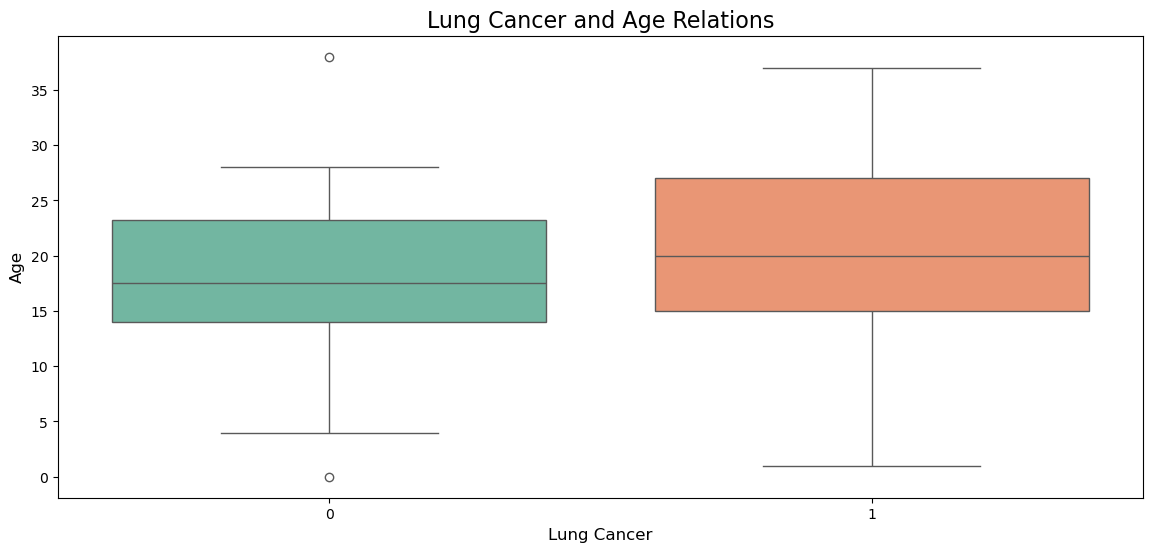

In [16]:
fig, ax = plt.subplots(figsize=(14, 6))

sns.boxplot(x = 'lung_cancer', y = 'age', palette='Set2', data = df)
ax.set_title("Lung Cancer and Age Relations", fontsize = 16)
ax.set_xlabel("Lung Cancer", fontsize = 12)
ax.set_ylabel("Age", fontsize = 12)
plt.show()

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

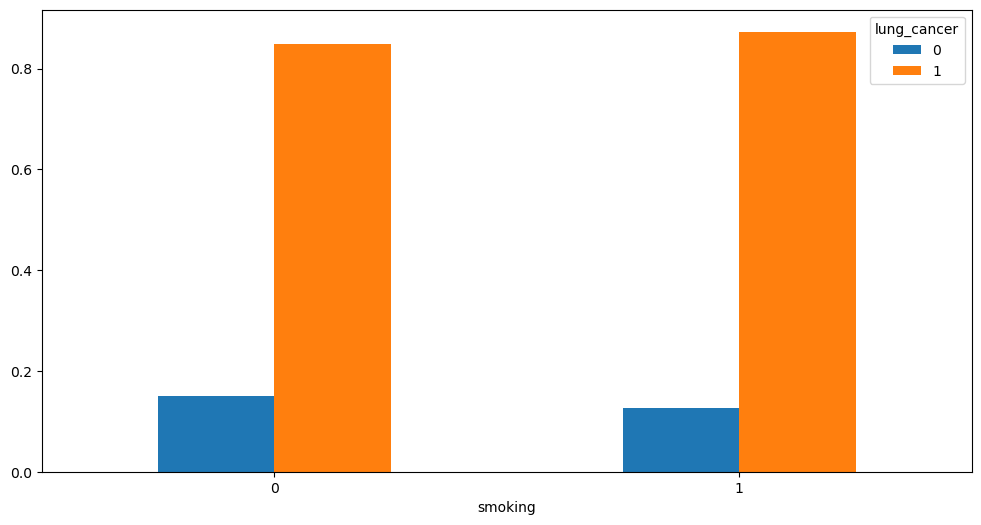

In [17]:
df.groupby('smoking')['lung_cancer'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(12,6));
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

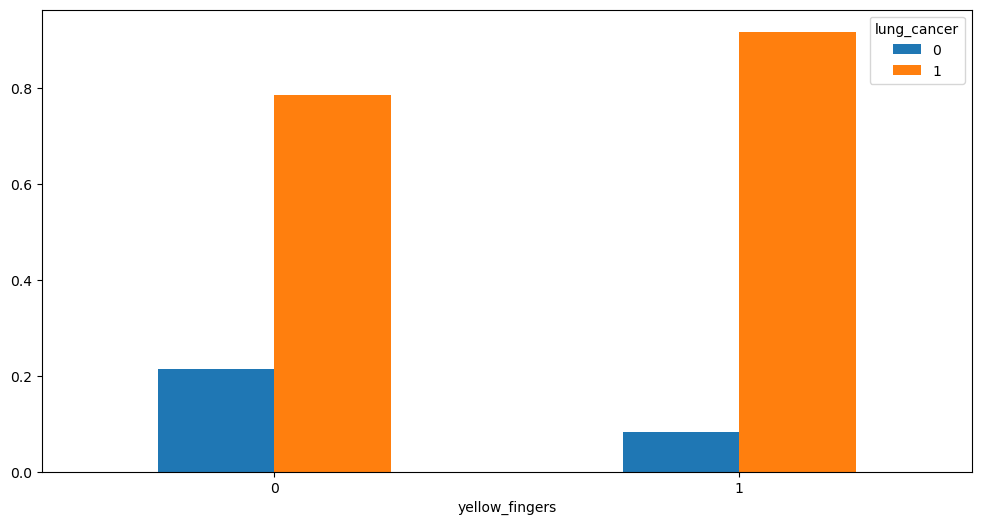

In [18]:
df.groupby('yellow_fingers')['lung_cancer'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(12,6));
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

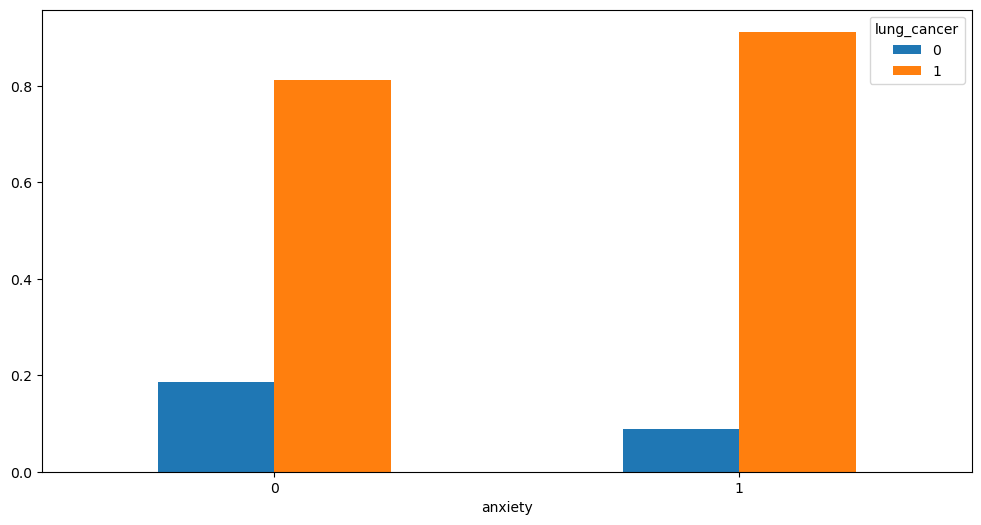

In [19]:
df.groupby('anxiety')['lung_cancer'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(12,6));
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

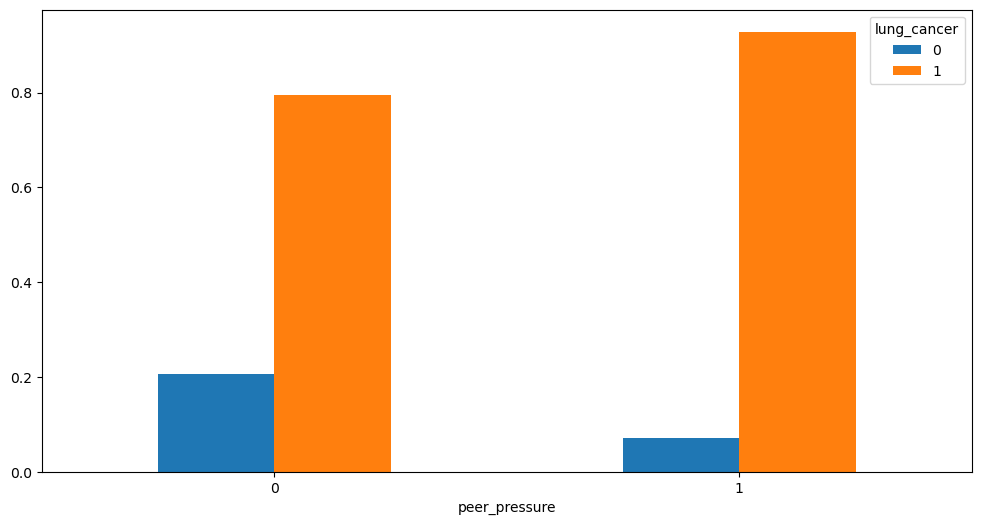

In [20]:
df.groupby('peer_pressure')['lung_cancer'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(12,6));
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

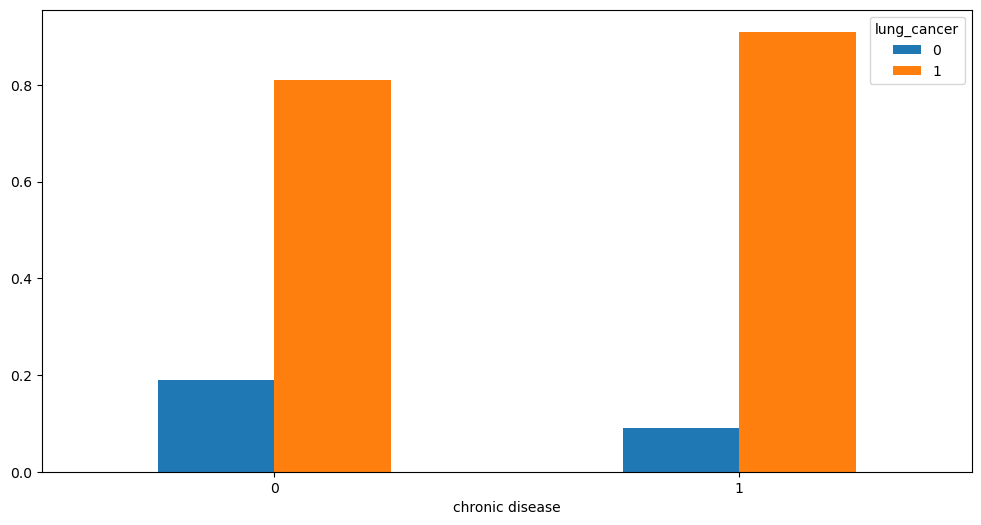

In [21]:
df.groupby('chronic disease')['lung_cancer'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(12,6));
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

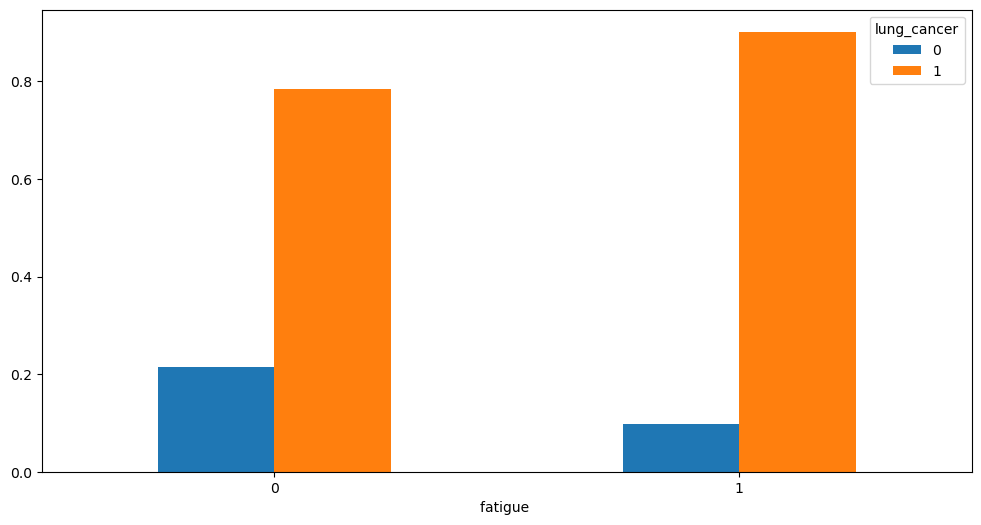

In [22]:
df.groupby('fatigue ')['lung_cancer'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(12,6));
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

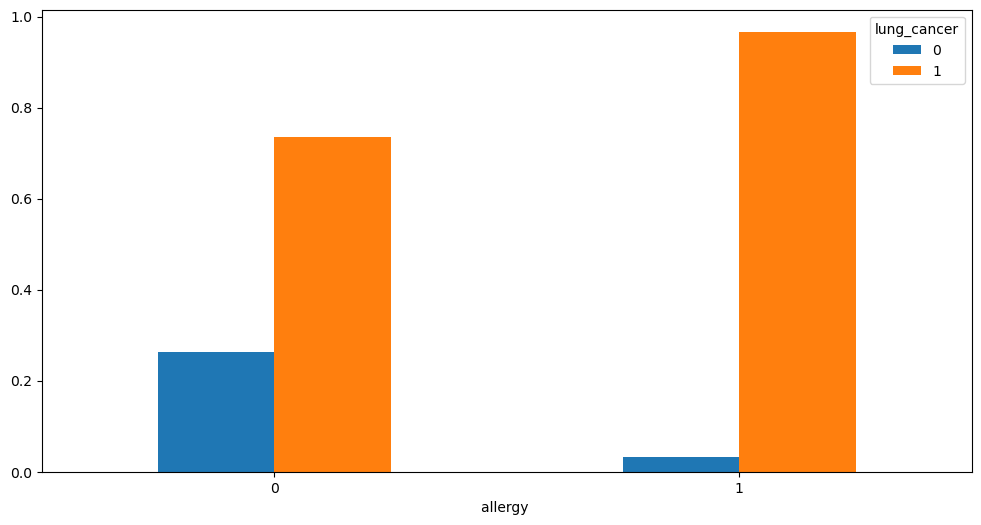

In [23]:
df.groupby('allergy ')['lung_cancer'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(12,6));
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

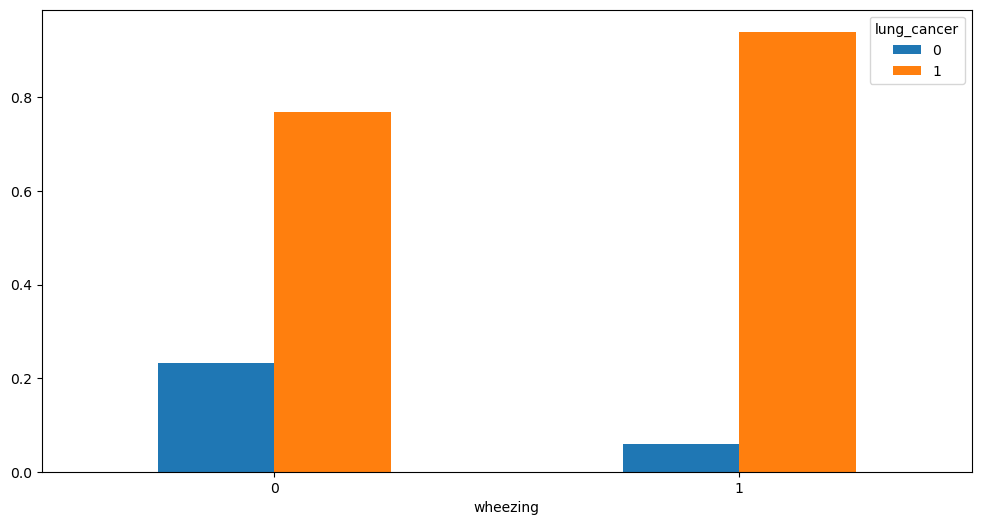

In [24]:
df.groupby('wheezing')['lung_cancer'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(12,6));
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

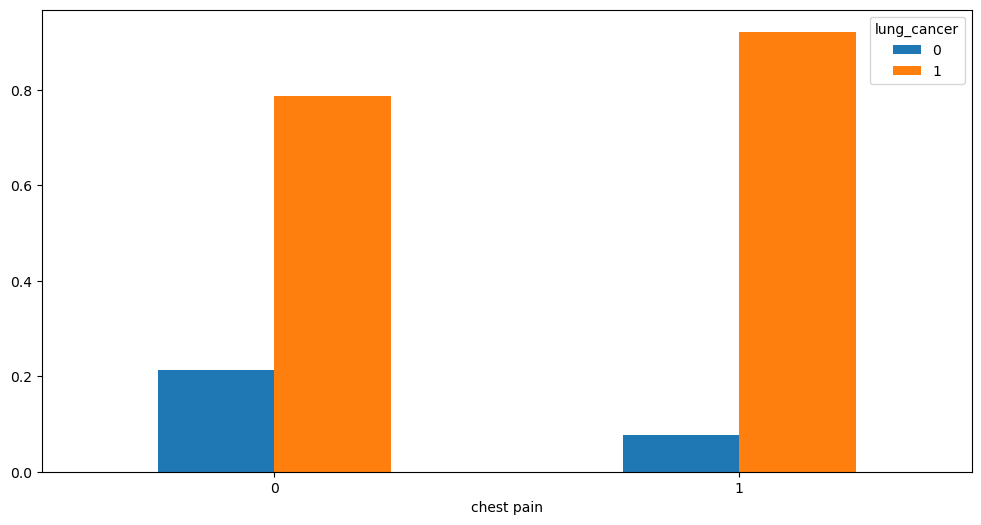

In [25]:
df.groupby('chest pain')['lung_cancer'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(12,6));
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

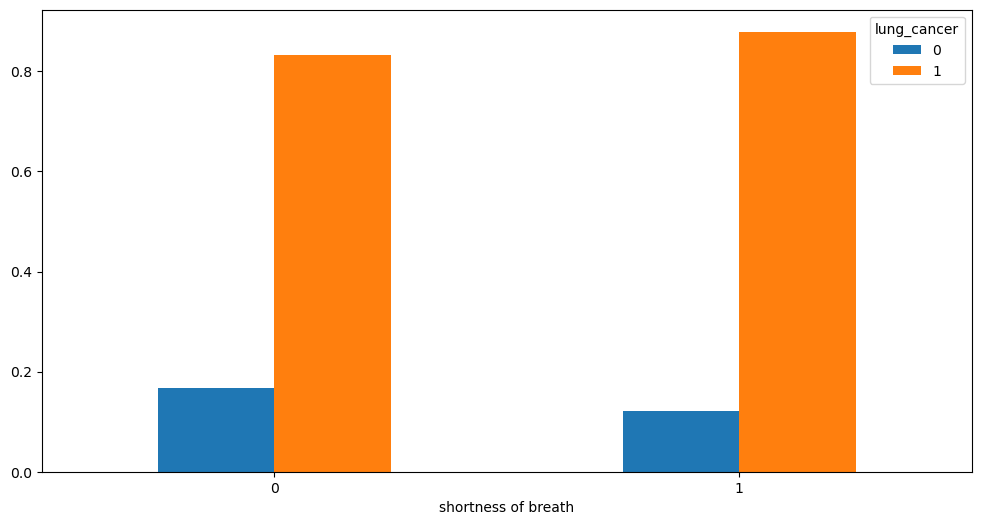

In [26]:
df.groupby('shortness of breath')['lung_cancer'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(12,6));
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

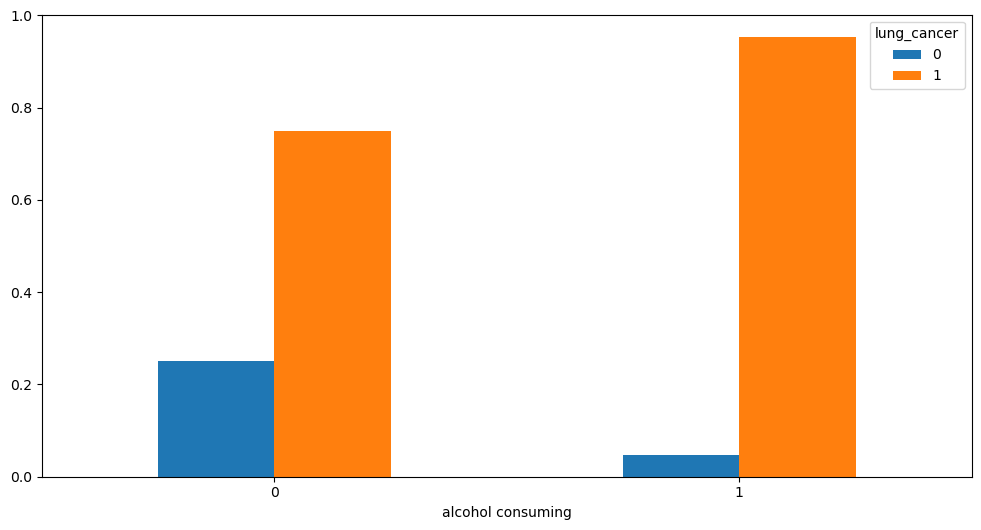

In [27]:
df.groupby('alcohol consuming')['lung_cancer'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(12,6));
plt.xticks(rotation=0)

In [28]:
df_updated = df.drop(columns=['gender','age'])
df_updated

,smoking,yellow_fingers,anxiety,peer_pressure,chronic disease,fatigue,allergy,wheezing,alcohol consuming,coughing,shortness of breath,swallowing difficulty,chest pain,lung_cancer
0,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0,1,1,1,0,0,1,1,0,1,0,1,0,1
280,1,0,0,0,1,1,1,0,0,0,1,0,0,0
281,1,0,0,0,0,1,1,0,0,0,1,0,1,0
282,0,1,1,0,0,0,0,0,0,0,0,1,1,0


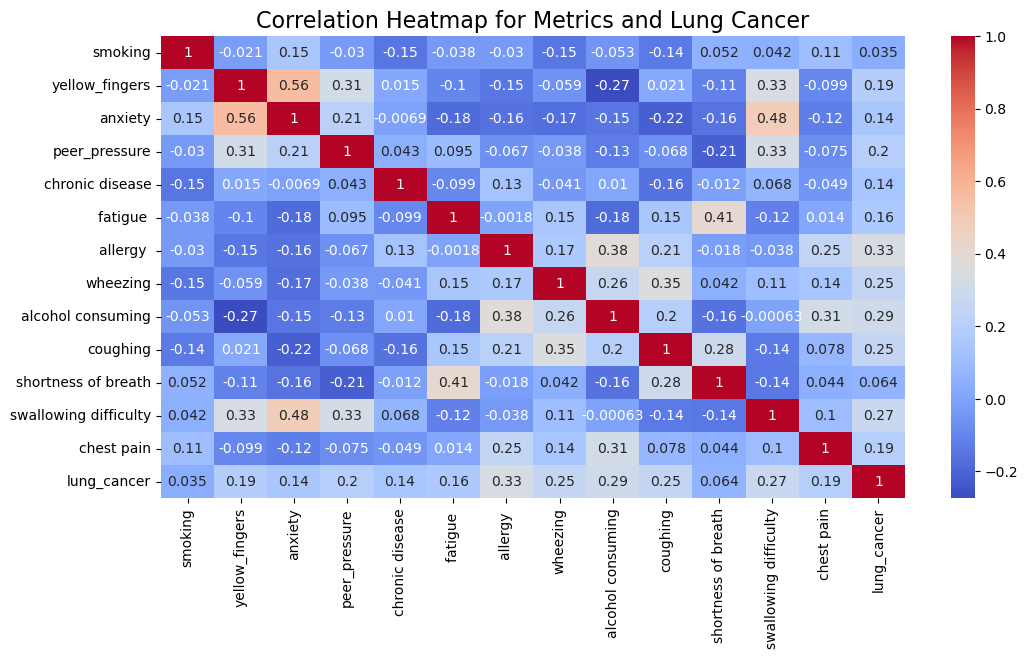

In [29]:
correlation_matrix = df_updated.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Metrics and Lung Cancer', fontsize = 16)
plt.show()

In [30]:
check = df_updated.select_dtypes(include=[np.number]).corr()
cor = check['lung_cancer'].sort_values(ascending=False)

print(cor.head(10))

lung_cancer              1.000000
allergy                  0.333552
alcohol consuming        0.294422
swallowing difficulty    0.268940
coughing                 0.253027
wheezing                 0.249054
peer_pressure            0.195086
chest pain               0.194856
yellow_fingers           0.189192
fatigue                  0.160078
Name: lung_cancer, dtype: float64


<Axes: >

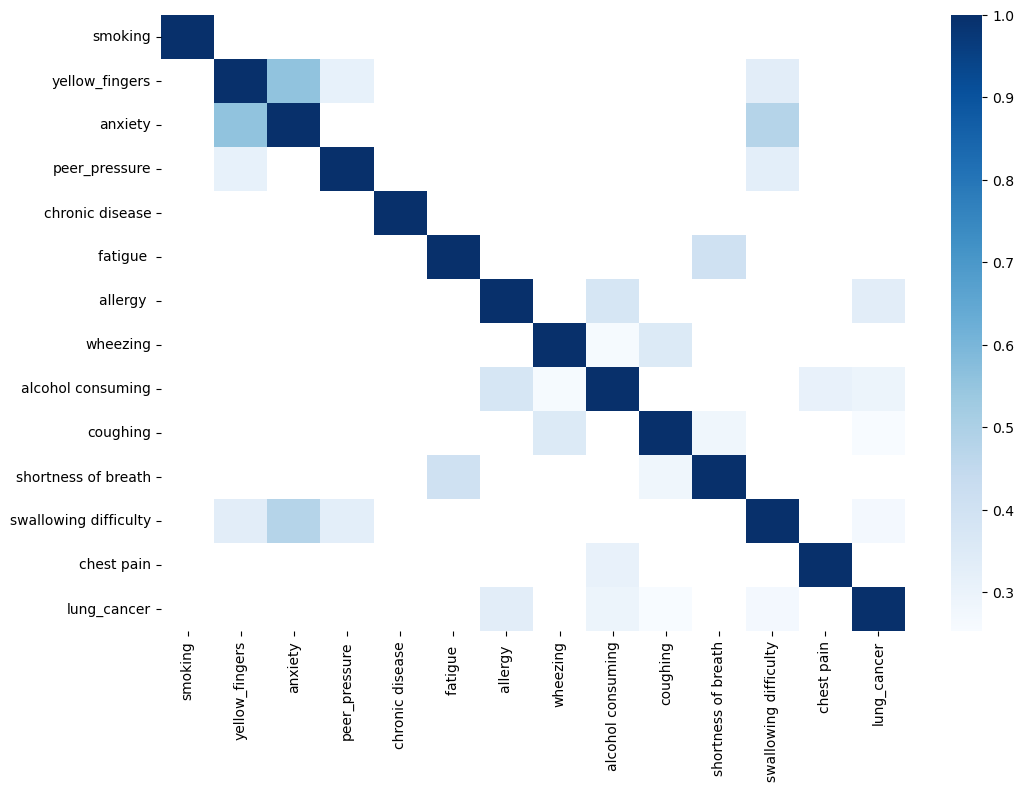

In [31]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix[correlation_matrix>=0.25], cmap="Blues")

Combining the two features to be able to create a new feature.

In [33]:
df_updated['allergalcohol']=df_updated['allergy ']*df_updated['alcohol consuming']
df_updated

,smoking,yellow_fingers,anxiety,peer_pressure,chronic disease,fatigue,allergy,wheezing,alcohol consuming,coughing,shortness of breath,swallowing difficulty,chest pain,lung_cancer,allergalcohol
0,0,1,1,0,0,1,0,1,1,1,1,1,1,1,0
1,1,0,0,0,1,1,1,0,0,0,1,1,1,1,0
2,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0
3,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0
4,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0,1,1,1,0,0,1,1,0,1,0,1,0,1,0
280,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0
281,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0
282,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0


In [34]:
X = df_updated.drop('lung_cancer', axis = 1)
y = df_updated['lung_cancer']
print("length of X: ", len(X))

length of X:  276


Adaptive Synthetic Sampling kullanarak azınlık sınıfa eklemeler yapalım ve veri setini daha stabil hale getirelim

In [36]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(sampling_strategy='minority', random_state=42)
X, y = adasyn.fit_resample(X, y)

print("length of X after adaptive synthetic sampling: ", len(X))

length of X after adaptive synthetic sampling:  472


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify = y)

In [38]:
rf = RandomForestClassifier(random_state=42)

rf_params = {
    'n_estimators': [100, 300, 500],
    'max_depth': [10, 20, 50],
    'min_samples_split': [2, 5, 10]
}

rf_grid = GridSearchCV(rf,
                    param_grid=rf_params,
                    n_jobs=-1,
                    cv = 10,
                    scoring='roc_auc')

rf_tuned = Pipeline([
    ('model', rf_grid)
])


rf_tuned.fit(X_train, y_train)

Pipeline(steps=[('model',
                 GridSearchCV(cv=10,
                              estimator=RandomForestClassifier(random_state=42),
                              n_jobs=-1,
                              param_grid={'max_depth': [10, 20, 50],
                                          'min_samples_split': [2, 5, 10],
                                          'n_estimators': [100, 300, 500]},
                              scoring='roc_auc'))])

In [39]:
train_accuracy_rf = accuracy_score(y_train, rf_tuned.predict(X_train))
test_accuracy_rf = accuracy_score(y_test, rf_tuned.predict(X_test))

print("Accuracies")
print(f'Train Accuracy: {train_accuracy_rf}')
print(f'Test Accuracy: {test_accuracy_rf}')

Accuracies
Train Accuracy: 0.9787798408488063
Test Accuracy: 0.9578947368421052


In [40]:
knn = KNeighborsClassifier()

knn_params = {
    'n_neighbors': np.arange(1,40),
    'weights': ['uniform', 'distance'],
}

knn_grid = GridSearchCV(knn,
                    param_grid=knn_params,
                    n_jobs=-1,
                    cv = 10,
                    scoring='roc_auc')

knn_tuned = Pipeline([
    ('model', knn_grid)
])

knn_tuned.fit(X_train, y_train)

Pipeline(steps=[('model',
                 GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
                              n_jobs=-1,
                              param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39]),
                                          'weights': ['uniform', 'distance']},
                              scoring='roc_auc'))])

In [41]:
train_accuracy_knn = accuracy_score(y_train, knn_tuned.predict(X_train))
test_accuracy_knn = accuracy_score(y_test, knn_tuned.predict(X_test))

print("Accuracies")
print(f'Train Accuracy: {train_accuracy_knn}')
print(f'Test Accuracy: {test_accuracy_knn}')

Accuracies
Train Accuracy: 0.9787798408488063
Test Accuracy: 0.9473684210526315


In [42]:
log = LogisticRegression(max_iter = 12000, random_state=42)

log_params = {
    'C': [0.001, 0.01, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg']
}

log_grid = GridSearchCV(log,
                    param_grid=log_params,
                    n_jobs=-1,
                    cv = 10,
                    scoring='roc_auc')

log_tuned = Pipeline([
    ('model', log_grid)
])

log_tuned.fit(X_train, y_train)

Pipeline(steps=[('model',
                 GridSearchCV(cv=10,
                              estimator=LogisticRegression(max_iter=12000,
                                                           random_state=42),
                              n_jobs=-1,
                              param_grid={'C': [0.001, 0.01, 1, 10, 100],
                                          'penalty': ['l1', 'l2'],
                                          'solver': ['lbfgs', 'liblinear',
                                                     'newton-cg']},
                              scoring='roc_auc'))])

In [43]:
train_accuracy_log = accuracy_score(y_train, log_tuned.predict(X_train))
test_accuracy_log = accuracy_score(y_test, log_tuned.predict(X_test))

print("Accuracies")
print(f'Train Accuracy: {train_accuracy_log}')
print(f'Test Accuracy: {test_accuracy_log}')

Accuracies
Train Accuracy: 0.9389920424403183
Test Accuracy: 0.9473684210526315


In [44]:
nb = MultinomialNB()

nb_params = {
    'alpha': [0.0, 1.0],
    'fit_prior' : [True, False]
}

nb_grid = GridSearchCV(nb,
                    param_grid=nb_params,
                    n_jobs=-1,
                    cv = 10,
                    scoring='roc_auc')

nb_tuned = Pipeline([
    ('model', nb_grid)
])

nb_tuned.fit(X_train, y_train)



Pipeline(steps=[('model',
                 GridSearchCV(cv=10, estimator=MultinomialNB(), n_jobs=-1,
                              param_grid={'alpha': [0.0, 1.0],
                                          'fit_prior': [True, False]},
                              scoring='roc_auc'))])

In [45]:
train_accuracy_nb = accuracy_score(y_train, nb_tuned.predict(X_train))
test_accuracy_nb = accuracy_score(y_test, nb_tuned.predict(X_test))

print("Accuracies")
print(f'Train Accuracy: {train_accuracy_nb}')
print(f'Test Accuracy: {test_accuracy_nb}')

Accuracies
Train Accuracy: 0.7214854111405835
Test Accuracy: 0.6631578947368421


In [46]:
r_probs = [0 for _ in range(len(y_test))]
rf_probs = rf_tuned.predict_proba(X_test)
knn_probs = knn_tuned.predict_proba(X_test)
log_probs = log_tuned.predict_proba(X_test)
nb_probs = nb_tuned.predict_proba(X_test)

rf_probs = rf_probs[:, 1]
knn_probs = knn_probs[:, 1]
log_probs = log_probs[:, 1]
nb_probs = nb_probs[:, 1]

In [47]:
r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
log_auc = roc_auc_score(y_test, log_probs)
nb_auc = roc_auc_score(y_test, nb_probs)

In [48]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs) 
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs) 
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs) 
log_fpr, log_tpr, _ = roc_curve(y_test, log_probs) 
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs) 


In [49]:
print('Random (chance) prediction: AUROC = %.4f' % (r_auc))
print('Random Forest: AUROC = %.4f' % (rf_auc))
print('K-Nearest Neighbors: AUROC = %.4f' % (knn_auc))
print('Logistic Regression: AUROC = %.4f' % (log_auc))
print('Multinomial Navie Bayes: AUROC = %.4f' % (nb_auc))

Random (chance) prediction: AUROC = 0.5000
Random Forest: AUROC = 0.9634
K-Nearest Neighbors: AUROC = 0.9639
Logistic Regression: AUROC = 0.9794
Multinomial Navie Bayes: AUROC = 0.7338


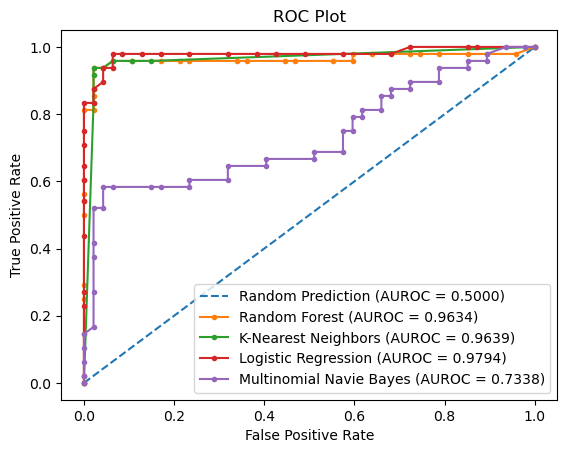

In [50]:
plt.plot(r_fpr, r_tpr, linestyle = '--', label = 'Random Prediction (AUROC = %0.4f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker = '.', label = 'Random Forest (AUROC = %0.4f)' % rf_auc)
plt.plot(knn_fpr, knn_tpr, marker = '.', label = 'K-Nearest Neighbors (AUROC = %0.4f)' % knn_auc)
plt.plot(log_fpr, log_tpr, marker = '.', label = 'Logistic Regression (AUROC = %0.4f)' % log_auc)
plt.plot(nb_fpr, nb_tpr, marker = '.', label = 'Multinomial Navie Bayes (AUROC = %0.4f)' % nb_auc)

plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [100]:
df_updated.columns

Index(['smoking', 'yellow_fingers', 'anxiety', 'peer_pressure',
       'chronic disease', 'fatigue ', 'allergy ', 'wheezing',
       'alcohol consuming', 'coughing', 'shortness of breath',
       'swallowing difficulty', 'chest pain', 'lung_cancer', 'allergalcohol'],
      dtype='object')

In [182]:

data = [[1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1]]

columns = ['smoking', 'yellow_fingers', 'anxiety', 'peer_pressure', 'chronic disease', 
           'fatigue ', 'allergy ', 'wheezing', 'alcohol consuming', 'coughing', 
           'shortness of breath', 'swallowing difficulty', 'chest pain', 'allergalcohol']


input_data = pd.DataFrame(data, columns=columns)

prediction = log_tuned.predict(input_data)[0]

if prediction == 0:
    churn_status = "Patient is not lung cancer"
elif prediction == 1:
    churn_status = "Patient is lung cancer"

print(churn_status)

Patient is lung cancer
